In [5]:
# train detection
import cv2
import shutil as st
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [10]:
def write_result_img(output_img, output_path): 
    # Đếm số lượng file hiện có trong thư mục
    count = 0
    for _, _, files in os.walk(output_path):
        count += len(files)
        
    # Tên file tiếp theo là số lượng file hiện tại + 1 
    count += 1
    if count == 7:
        print(output_path)
    output_path += "/" + str(count)+".jpg"
    check = cv2.imwrite(output_path, output_img)
    if not check:
        print("Fail to save file!", output_path)

In [78]:
def train_detection(dir):
    output = dir + "output/"
    if not os.path.exists(output):
        os.makedirs(output)
    remov_list = output + "remov_list/"
    if not os.path.exists(remov_list):
        os.makedirs(remov_list)
        
    for file in os.listdir(dir):
        file_path = dir + file
        if os.path.isdir(file_path):
            continue
        img = cv2.imread(file_path)
        bboxes = face_cascade.detectMultiScale(image=img)
        if len(bboxes)==0:
            st.copy(file_path, remov_list)
            os.remove(file_path)
            continue
        for (x,y,w,h) in bboxes:
            cv2.rectangle(img,(x,y), (x+w,y+h),(0, 255, 0), 2)
        try:
            write_result_img(img, output)
        except:
            print(file_path)
        
train_detection('./Data/train/fer/SURPRISED/')    

./Data/train/fer/SURPRISED/output/


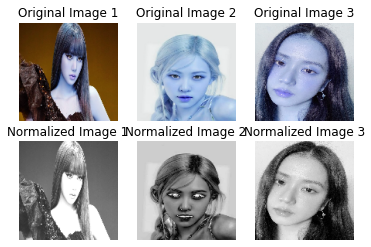

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def normalize_brightness_contrast(images):
    """
    Chuẩn hóa độ sáng và độ tương phản của một tập hình ảnh.
    images: danh sách các ảnh đầu vào
    """
    # Tính toán giá trị trung bình và độ lệch chuẩn của tất cả các ảnh trong tập dữ liệu
    mean_value = np.mean(images)
    std_value = np.std(images)

    normalized_images = []
    for image in images:
        # Chuyển ảnh sang xám
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Chuẩn hóa độ sáng và độ tương phản của mỗi ảnh
        normalized_image = (image - np.mean(image)) / np.std(image) * std_value + mean_value

        # Chuyển đổi định dạng ảnh về 8-bit unsigned integer
        normalized_image = cv2.convertScaleAbs(normalized_image)

        normalized_images.append(normalized_image)

    return normalized_images

# Đọc tập hình ảnh
image_paths = ['../Data/train/fr/LISA/20211215150951-bd46.jpg', '../Data/train/fr/ROSE/66L5p_5_c.jpg', '../Data/train/fr/JISOO/34cedff5d45801b2118631fcae8f4130.jpg']
images = [cv2.imread(image_path) for image_path in image_paths]

# Thay đổi kích thước của ảnh thành (128, 128)
images = [cv2.resize(image, (128, 128)) for image in images]

# Chuẩn hóa độ sáng và độ tương phản của tập hình ảnh
normalized_images = normalize_brightness_contrast(images)

# Hiển thị ảnh gốc và ảnh đã chuẩn hóa
for i in range(len(images)):
    plt.subplot(2, len(images), i+1)
    plt.imshow(cv2.cvtColor(images[i], 0))
    plt.title(f'Original Image {i+1}')
    plt.axis('off')

    plt.subplot(2, len(images), len(images) + i+1)
    plt.imshow(cv2.cvtColor(normalized_images[i], 0))
    plt.title(f'Normalized Image {i+1}')
    plt.axis('off')

plt.show()


In [12]:
import os
import random
import shutil

def split_photos(source_path, train_path, test_path, ratio):
    # Lấy danh sách file
    photo_files = os.listdir(source_path)
    random.shuffle(photo_files)

    # Tính số lượng ảnh phân chia ra cho 2 tập train, test
    split_point = int(len(photo_files) * ratio)

    # Tạo đường dẫn đích nếu chưa tồn tại
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

    # Copy ảnh đến đường dẫn đích
    for i, photo_file in enumerate(photo_files):
        if i < split_point:
            shutil.copy(os.path.join(source_path, photo_file), train_path)
        else:
            shutil.copy(os.path.join(source_path, photo_file), test_path)


start_path = '../Data/source'
src_path =''
ratio = 0.8  # 80% for training, 20% for testing

# Duyệt qua từng thư mục cần kiểm thử
for sub_dir in os.listdir(start_path):
    sub_path = start_path + "/" + sub_dir
    print(sub_path)
    
    # Đảm bảo đường dẫn là một thư mục
    if os.path.isdir(sub_path):
        for sub_sub_dir in os.listdir(sub_path):
            src_path = sub_path + '/' + sub_sub_dir
            print(src_path)
            # Đảm bảo đường dẫn là một thư mục
            if os.path.isdir(src_path):
                train_path = src_path.replace('source', 'train')
                test_path = src_path.replace('source', 'test')
                split_photos(src_path, train_path, test_path, ratio)


../Data/source/fer
../Data/source/fer/ANGRY
../Data/source/fer/FEAR
../Data/source/fer/HAPPY
../Data/source/fer/NEUTRAL
../Data/source/fer/SAD
../Data/source/fer/SURPRISED
../Data/source/fr
../Data/source/fr/JAMES
../Data/source/fr/JENNIE
../Data/source/fr/JISOO
../Data/source/fr/LISA
../Data/source/fr/ROSE


In [25]:
path_list = ['../Data/train', '../Data/test']
src_path =''
ratio = 0.8  # 80% for training, 20% for testing

# Duyệt qua từng thư mục cần kiểm thử
for start_path in path_list:
    for sub_dir in os.listdir(start_path):
        sub_path = start_path + "/" + sub_dir
        
        # Đảm bảo đường dẫn là một thư mục
        if os.path.isdir(sub_path):
            for sub_sub_dir in os.listdir(sub_path):
                src_path = sub_path + '/' + sub_sub_dir + '/'
                # Đảm bảo đường dẫn là một thư mục
                if os.path.isdir(src_path):
                    print(src_path, end=': ')
                    count = 0
                    for file in os.listdir(src_path):
                        count += 1
                    print(str(count)+' files')
    print()

../Data/train/fer/ANGRY/: 33 files
../Data/train/fer/FEAR/: 10 files
../Data/train/fer/HAPPY/: 52 files
../Data/train/fer/NEUTRAL/: 32 files
../Data/train/fer/SAD/: 42 files
../Data/train/fer/SURPRISED/: 21 files
../Data/train/fr/JAMES/: 111 files
../Data/train/fr/JENNIE/: 129 files
../Data/train/fr/JISOO/: 141 files
../Data/train/fr/LISA/: 147 files
../Data/train/fr/ROSE/: 156 files

../Data/test/fer/ANGRY/: 9 files
../Data/test/fer/FEAR/: 3 files
../Data/test/fer/HAPPY/: 13 files
../Data/test/fer/NEUTRAL/: 8 files
../Data/test/fer/SAD/: 11 files
../Data/test/fer/SURPRISED/: 6 files
../Data/test/fr/JAMES/: 28 files
../Data/test/fr/JENNIE/: 33 files
../Data/test/fr/JISOO/: 36 files
../Data/test/fr/LISA/: 37 files
../Data/test/fr/ROSE/: 40 files

